In [1]:
from pathlib import Path
import numpy as np
import scipy.io as scio
from os import listdir
import os.path as opt
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from torch.utils.data import random_split, SubsetRandomSampler
import torch
import yaml
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
dir = '/data/zhang_t/data/data_res/2022-12-17-16-13-46'
radar_data = scio.loadmat(opt.join(dir, 'three_tensor.mat'))
# 将图片长宽颠倒，变为(range,another)
radar_data_doppler = np.transpose(radar_data['doppler_res'], (0, -1, -2))
radar_data_azimuth = np.transpose(radar_data['azimuth_res'], (0, -1, -2))

In [10]:
d = radar_data_azimuth
def draw(d):
    d = d.reshape(-1)
    mu=np.mean(d)   
    sigma =np.std(d)  
    count, bins, ignored = plt.hist(d, 300)
    plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2)), linewidth=2, color='orange')
    plt.show()  

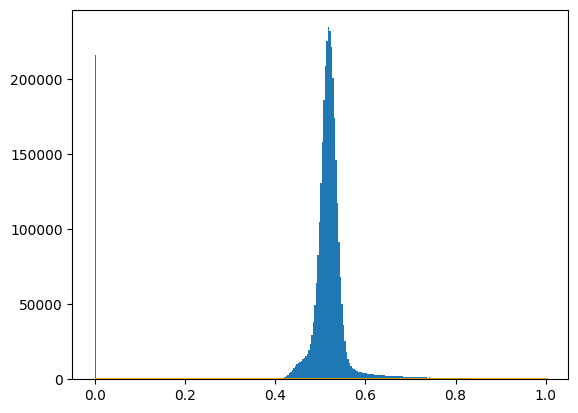

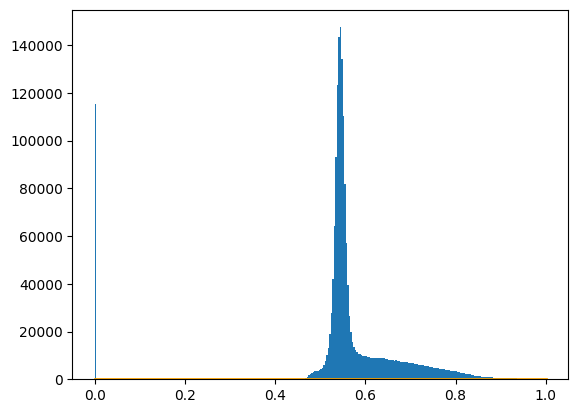

In [18]:
def norm(dt):
    dt = np.log(dt+1+1e-6)
    max = np.max(dt)
    dt = dt/max
    return dt
d = norm(radar_data_doppler)
draw(d)
a = norm(radar_data_azimuth)
draw(a)


In [23]:
np.sum(a<0.00000001)

0